<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Applied data analysis tasks</center></h1>
<h2><center>Homework 3: Time Series Forecasting</center></h2>

# Introduction

In this assignment, you will have to understand the basics of time series analysis and forecasting.


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [292]:
import warnings
warnings.filterwarnings("ignore")

In [293]:
# !pip install orbit-ml
# !pip install prophet
# !pip install sktime[all_extras]

In [294]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


## Task 1 (1 point). Data search and preprocessing.

In this task, you need to _independently_ find two time series: one should have a monthly frequency, and the other — a daily frequency.

We recommend searching for appropriate time series on the [Kaggle](https://www.kaggle.com/datasets) platform or take one of the [popular](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) time series for analysis. 

**It is not recommended** to use financial instrument price time series due to the poor predictability of price changes. **It is prohibited** to use ready-made datasets from libraries for time series analysis, such as `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)

### Report for the task:

* Describe the sources of the time series (links to download pages). If the data required additional processing, provide the code for this processing, upload the data to your personal cloud storage, and provide the download link. The process of obtaining time series should be **clearly** described and fully **reproducible**. 

* Provide the code for reading the time series from the files and splitting them into train/test sets. The ratio of train/test sizes is up to you, but we recommend choosing 80% for training and 20% for testing, as long as there are a couple of years of observations remaining in the test set.


In [295]:
!wget https://raw.githubusercontent.com/Nikita-Dvornov/IAD_HW3-time-series-analysis-/main/FRBLMCI.csv # https://www.kaggle.com/datasets/federalreserve/change-in-labor-market-conditions-index
!wget https://raw.githubusercontent.com/Nikita-Dvornov/IAD_HW3-time-series-analysis-/main/complete_dataset.csv # https://www.kaggle.com/datasets/aramacus/electricity-demand-in-victoria-australia

--2022-04-28 19:39:25--  https://raw.githubusercontent.com/Nikita-Dvornov/IAD_HW3-time-series-analysis-/main/FRBLMCI.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18482 (18K) [text/plain]
Saving to: ‘FRBLMCI.csv.1’

FRBLMCI.csv.1       100%[===================>]  18.05K  --.-KB/s    in 0s      

2022-04-28 19:39:25 (82.4 MB/s) - ‘FRBLMCI.csv.1’ saved [18482/18482]

--2022-04-28 19:39:25--  https://raw.githubusercontent.com/Nikita-Dvornov/IAD_HW3-time-series-analysis-/main/complete_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response...

In [296]:
# считаем файлы
ts1 = pd.read_csv('FRBLMCI.csv')
ts2 = pd.read_csv('complete_dataset.csv')

In [297]:
ts1 = ts1.loc[:, 'date':'value'].set_index('date')
ts2 = ts2.loc[:, 'date':'demand'].set_index('date')

In [298]:
# сделаем разбиение на train/test
index_train, index_test = ts1[:int(ts1.shape[0]*0.8)], ts1[int(ts1.shape[0]*0.8):]
demand_train, demand_test = ts2[:int(ts2.shape[0]*0.8)], ts2[int(ts2.shape[0]*0.8):]

## Task 2. Time Series Analysis (1 point).

* Plot the time series and visually distinguish the split into train/test sets — either with a vertical line or with different colors.

* Plot the [autocorrelation functions](https://www.machinelearningmastery.ru/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788/) for the selected time series. Comment on them: are the time series seasonal? Is the length of the seasonal component of the series visible on the graphs?

* In case of seasonality, split the time series into repeating fragments and plot them overlaid to illustrate this seasonality.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

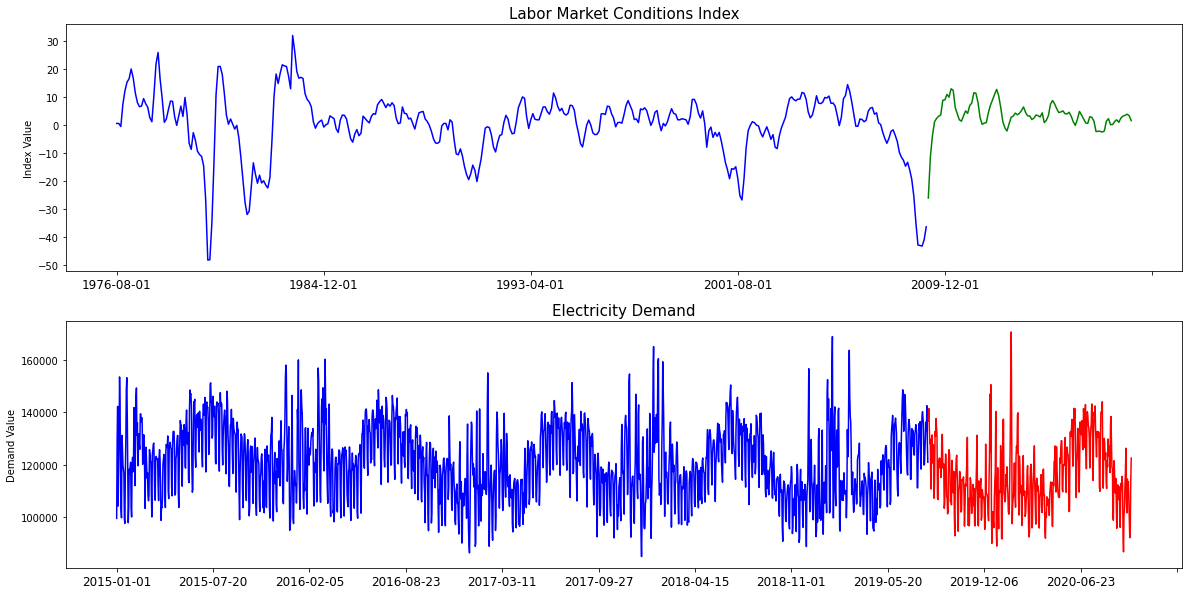

In [299]:
# отрисуем временные ряды
import matplotlib.ticker as ticker
fig, ax = plt.subplots(2, figsize=(20, 10))
ax[0].plot(index_train, c = 'b')
ax[0].plot(index_test, c = 'g')
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(100))
ax[0].set_title('Labor Market Conditions Index', fontsize=15)
ax[0].set_ylabel('Index Value', fontsize=10)
ax[0].tick_params(axis='x', labelsize=12)

ax[1].plot(demand_train, c = 'b')
ax[1].plot(demand_test, c = 'r')
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(200))
ax[1].set_title('Electricity Demand', fontsize=15)
ax[1].set_ylabel('Demand Value', fontsize=10)
ax[1].tick_params(axis='x', labelsize=12)

<AxesSubplot:>

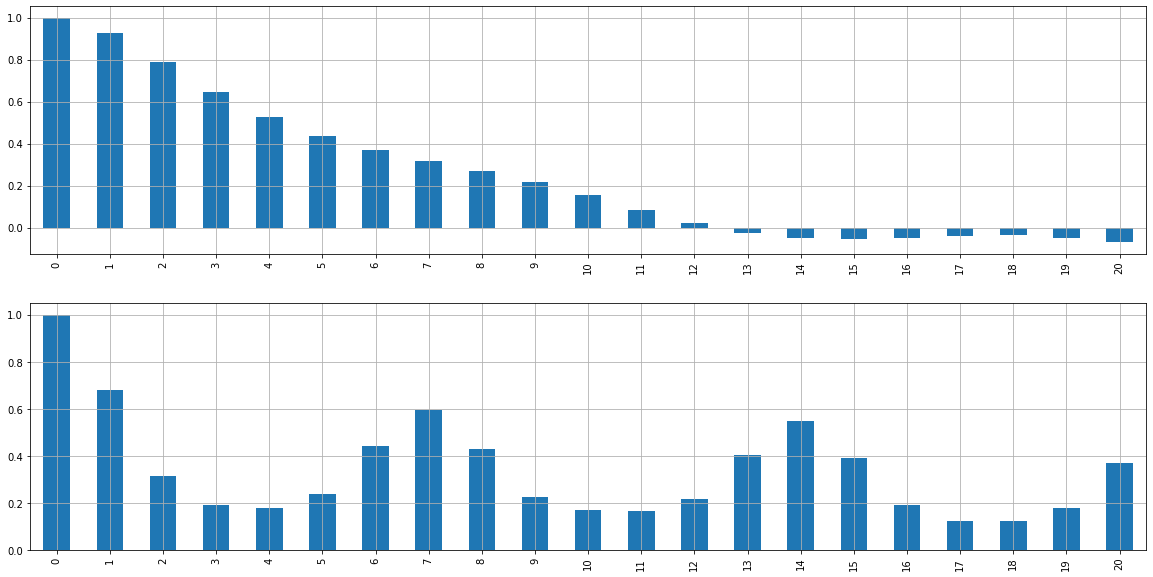

In [300]:
# calculate and draw a graph of the autocorrelation function
# hint, используйте для этого np.correlate(..., mode='full')
from statsmodels.tsa.stattools import acf, pacf

index_acf = pd.Series(acf(ts1, nlags=20))
demand_acf = pd.Series(acf(ts2, nlags=20))

# index_pacf = pacf(ts1, nlags=20)
# demand_pacf = pacf(ts2, n_lags=20)

fig, (ax1, ax2) =  plt.subplots(2, 1, figsize=(20, 10))
index_acf.plot.bar(grid=True, ax=ax1)
demand_acf.plot.bar(grid=True, ax=ax2)

In [301]:
import statsmodels.api as sm

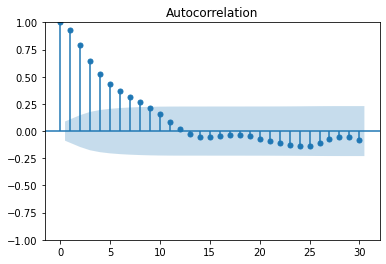

In [302]:
sm.graphics.tsa.plot_acf(ts1, lags=30)
plt.show()

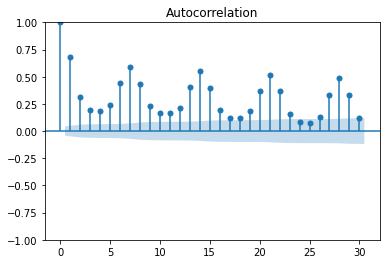

In [303]:
sm.graphics.tsa.plot_acf(ts2, lags=30)
plt.show()

In [304]:
# divide the time series into repeating sections according to the length of the seasonal component and draw them superimposed

# The second time series obviously has seasonality (about a year), which is proved by the graph below
first_season = ts2[190:550].reset_index().drop('date', axis=1)
second_season = ts2[550:910].reset_index().drop('date', axis=1)
third_season = ts2[910:1270].reset_index().drop('date', axis=1)
forth_season = ts2[1270:1630].reset_index().drop('date', axis=1)
fifth_season = ts2[1630:1990].reset_index().drop('date', axis=1)

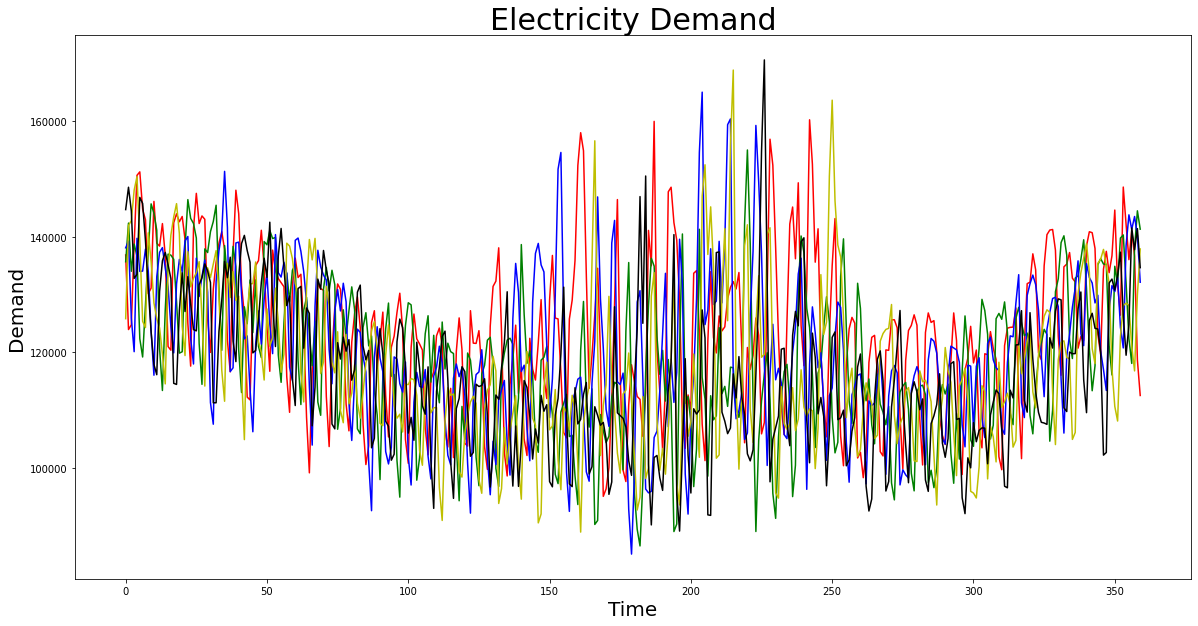

In [305]:
plt.figure(figsize=(20, 10))
plt.plot(first_season, c='r')
plt.plot(second_season, c='g')
plt.plot(third_season, c='b')
plt.plot(forth_season, c='y')
plt.plot(fifth_season, c='k')
plt.title('Electricity Demand', fontsize=30)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Demand', fontsize=20)
plt.show()

There is no particular seasonality in the time series devoted to the Labor Market Conditions Index (except with a period of several years, and then not from the very beginning of observations due to the different variance). The ACF also shows the non-stationarity of the series.

## Task 3. Prediction of a monthly time series (4 points).

In this task, you will have to try to predict a monthly time series using several ready-made models with a sliding or growing window and choose the best one among them.

As a comparison metric, use the MAE between the true and predicted values of the series in the test segment.

### NaiveForecaster from sktime (1 point).

Calculate the predictions using the following two naive methods:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [306]:
from sklearn.metrics import mean_absolute_error

In [307]:
# !pip install sktime

In [308]:
from sktime.forecasting.naive import NaiveForecaster

# ваш код обучения моделей здесь

naive_forecaster_1 = NaiveForecaster()
y_pred_t = naive_forecaster_1.fit_predict(index_train.values, fh=np.arange(index_test.shape[0]))

# исходя из графика временного ряда, можно предположить, что сезонность около 6 лет (72 месяца)
naive_forecaster_2 = NaiveForecaster(sp=72)
y_pred_seasonality = naive_forecaster_2.fit_predict(index_train.values, fh=np.arange(index_test.shape[0]))

In [309]:
# посчитайте метрики на test

print(mean_absolute_error(index_test, y_pred_t))
print(mean_absolute_error(index_test, y_pred_seasonality))

39.813131313131315
8.313131313131313


### ARIMA/AutoArima (1 point).
Train models from the `sktime` library:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` in `sktime`)
* Hindman-Handakar algorithm for SARIMA tuning (`AutoARIMA` in `sktime`)

In [310]:
# !pip install pmdarima

In [311]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

# ваш код обучения моделей здесь
forecaster_1 = ARIMA(order=(1, 1, 1), seasonal_order=(1, 0, 0, 12))
forecaster_1.fit(pd.Series(index_train.values.reshape(-1)))
y_pred_1 = forecaster_1.predict(fh=np.arange(index_test.shape[0]))

forecaster_2 = AutoARIMA()
forecaster_2.fit(pd.Series(index_train.values.reshape(-1)))
y_pred_2 = forecaster_2.predict(fh=np.arange(index_test.shape[0]))

In [312]:
# посчитайте метрики на test
print(mean_absolute_error(index_test, y_pred_1))
print(mean_absolute_error(index_test, y_pred_2))

39.93126930483478
6.083987952304602


### LGT/DLT (1 point).

Train the models LGT and DLT with the library `orbit`

In [313]:
# !pip install orbit-ml

In [314]:
from orbit.models import LGT
from orbit.models import DLT

# ваш код обучения моделей здесь

lgt = LGT(response_col='value', date_col='date', seasonality=72)
lgt.fit(index_train.reset_index())
y_pred_lgt = lgt.predict(index_test.reset_index())

dlt = DLT(response_col='value', date_col='date', seasonality=72)
dlt.fit(index_train.reset_index())
y_pred_dlt = dlt.predict(index_test.reset_index())

To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [315]:
# посчитайте метрики на test

print(mean_absolute_error(index_test, y_pred_lgt['prediction']))
print(mean_absolute_error(index_test, y_pred_dlt['prediction']))

4.823452148648956
26.41666659016904


### ETS (1 point).

Train models from the `sktime` library:

* ETS(AAA) (`ExponentialSmoothing` in `sktime`)
* ETS with automatic selection by AIC (`AutoETS` in `sktime`)

In [316]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

# ваш код обучения моделей здесь

# в трейновом датасете примерно 5 периодов по 6 лет, поэтому sp=5
forecaster_exp_sm = ExponentialSmoothing(trend='additive', seasonal='additive', sp=5)
forecaster_exp_sm.fit(index_train.values)
y_pred_exp_sm = forecaster_exp_sm.predict(fh=np.arange(index_test.shape[0]))

forecaster_auto = AutoETS()
forecaster_auto.fit(index_train.values)
y_pred_auto = forecaster_auto.predict(fh=np.arange(index_test.shape[0]))

In [317]:
# посчитайте метрики на test
print(mean_absolute_error(index_test, y_pred_exp_sm))
print(mean_absolute_error(index_test, y_pred_auto))

44.60625279210058
39.81358901264626


Plot the predictions for the best model with the confidence interval (if the model provides one) and overlay them on the true values. In `sktime`, the `ETS` model does not yet provide confidence intervals, but you can try to get them with some effort :)


The best-performing model was LGT with an MAE slightly below five. Let's plot the predicted and true values, with and without the confidence interval, since the bounds of the interval are highly disproportionate to the data itself.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


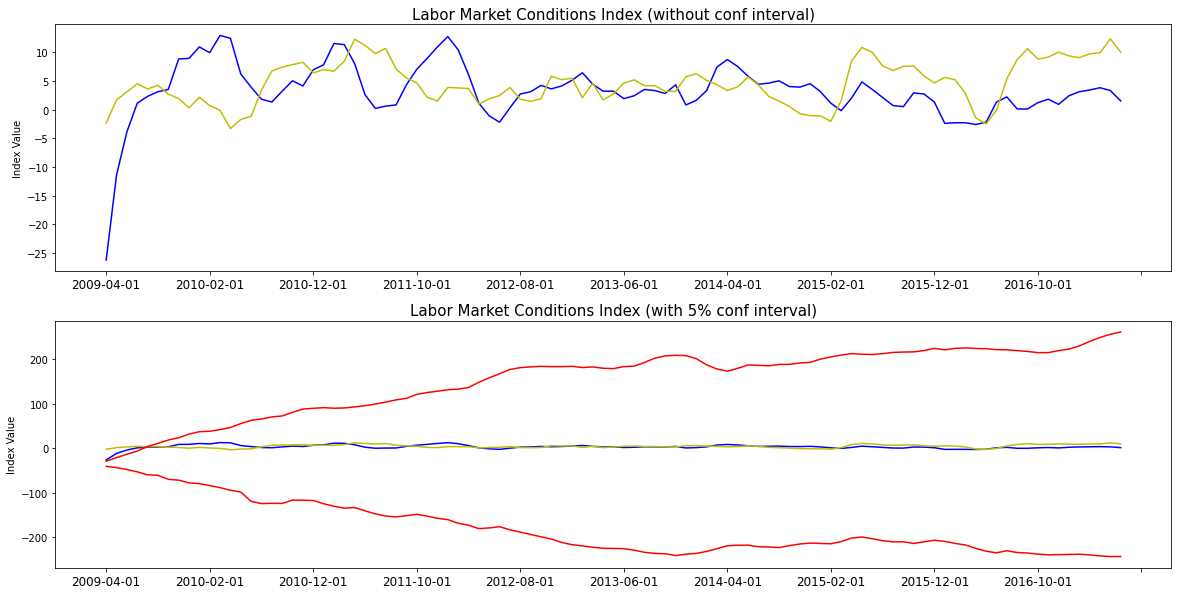

In [318]:
fig, ax = plt.subplots(2, figsize=(20, 10))

ax[0].set_title('Labor Market Conditions Index (without conf interval)', fontsize=15)
ax[0].plot(index_test, c='b')
ax[0].plot(y_pred_lgt['prediction'], c='y')
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(10))
ax[0].set_ylabel('Index Value', fontsize=10)
ax[0].tick_params(axis='x', labelsize=12)


ax[1].set_title('Labor Market Conditions Index (with 5% conf interval)', fontsize=15)
ax[1].plot(index_test, c='b')
ax[1].plot(y_pred_lgt['prediction'], c='y')
ax[1].plot(y_pred_dlt['prediction_5'], c='r')
ax[1].plot(y_pred_dlt['prediction_95'], c='r')
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(10))
ax[1].set_ylabel('Index Value', fontsize=10)
ax[1].tick_params(axis='x', labelsize=12)

plt.show()

## Task 4. Prediction of the daily time series (3 points).

In this task, you will have to try to predict the daily time series you have chosen.

Similarly, we use MAE as a metric.


### NaiveForecaster из sktime (1 point).

Calculate the predictions in the following two naive ways:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [319]:
from sktime.forecasting.naive import NaiveForecaster

# ваш код обучения моделей здесь

naive_forecaster_1 = NaiveForecaster()
y_pred_t = naive_forecaster_1.fit_predict(demand_train.values, fh=np.arange(demand_test.shape[0]))

# сезонность примерно годовая, поэтому sp=360
naive_forecaster_2 = NaiveForecaster(sp=360)
y_pred_seasonality = naive_forecaster_2.fit_predict(demand_train.values, fh=np.arange(demand_test.shape[0]))

In [320]:
# посчитайте метрики на test

print(mean_absolute_error(demand_test, y_pred_t))
print(mean_absolute_error(demand_test, y_pred_seasonality))

11716.013045023692
12756.557571090047


### KTR from `orbit` (1 балл).


In [321]:
from orbit.models import KTR

# ваш код обучения моделей здесь

ktr = KTR(response_col='demand', date_col='date', seasonality=360, seed=2022)
ktr.fit(demand_train.reset_index())
y_pred_ktr = ktr.predict(demand_test.reset_index())

INFO:root:Guessed max_plate_nesting = 1


In [322]:
# посчитайте метрики на test
print(mean_absolute_error(demand_test, y_pred_ktr['prediction']))

13313.882026255733


### Phophet (1 балл).



In [323]:
demand_train_prophet = demand_train.reset_index().rename(columns={"date": "ds", "demand": "y"}, inplace=False)
demand_test_prophet = demand_test.reset_index().rename(columns={"date": "ds", "demand": "y"}, inplace=False)

In [324]:
from prophet import Prophet

# ваш код обучения моделей здесь

prophet = Prophet()
prophet.fit(demand_train_prophet.reset_index())
y_pred_prophet = prophet.predict(demand_test_prophet.reset_index())

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [325]:
# посчитайте метрики на test

print(mean_absolute_error(demand_test, y_pred_prophet['yhat']))

6704.389675738037


Draw predictions with a confidence interval for the best model (if the model gives it out) and overlay them with the true values.

The Prophet model performed the prediction task best. We will also depict the true and predicted values together with and without the confidence interval, as it overly complicates the picture.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


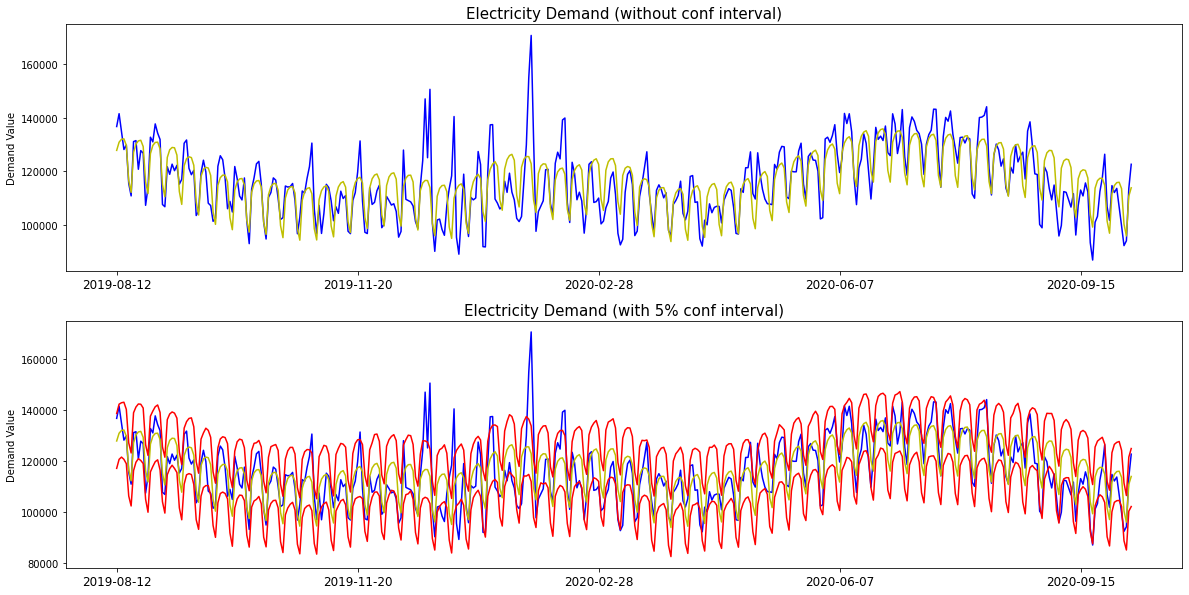

In [326]:
# нарисуйте пресказания

fig, ax = plt.subplots(2, figsize=(20, 10))

ax[0].set_title('Electricity Demand (without conf interval)', fontsize=15)
ax[0].plot(demand_test, c='b')
ax[0].plot(y_pred_prophet['yhat'], c='y')
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(100))
ax[0].set_ylabel('Demand Value', fontsize=10)
ax[0].tick_params(axis='x', labelsize=12)

ax[1].set_title('Electricity Demand (with 5% conf interval)', fontsize=15)
ax[1].plot(demand_test, c='b')
ax[1].plot(y_pred_prophet['yhat'], c='y')
ax[1].plot(y_pred_prophet['yhat_lower'], c='r')
ax[1].plot(y_pred_prophet['yhat_upper'], c='r')
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(100))
ax[1].set_ylabel('Demand Value', fontsize=10)
ax[1].tick_params(axis='x', labelsize=12)

plt.show()

## Task 5. Prediction of a time series by machine learning models (1 point).

Take one of your rows and use it to form an object-feature matrix and a target vector.

Divide the data into train/test in the same proportion as in the tasks above.

Train various classical machine learning models and evaluate their quality (MAE). 

Which of the models performed the prediction task best?

Now work with the second dataset

In [327]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [328]:
# ранее выяснилось, что период сезонности около года
decomposition = seasonal_decompose(ts2['demand'], model = "additive", period=360)

<AxesSubplot:xlabel='date'>

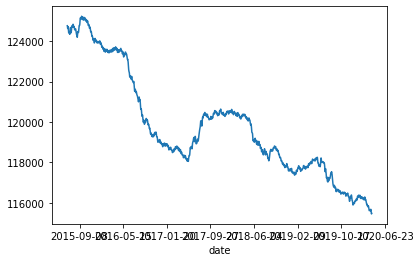

In [329]:
decomposition.trend.plot()

<AxesSubplot:xlabel='date'>

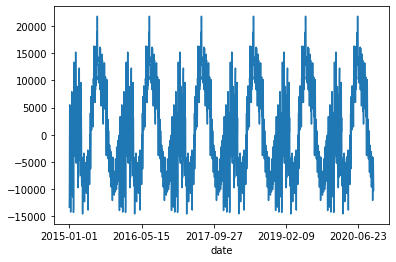

In [330]:
decomposition.seasonal.plot()

<AxesSubplot:xlabel='date'>

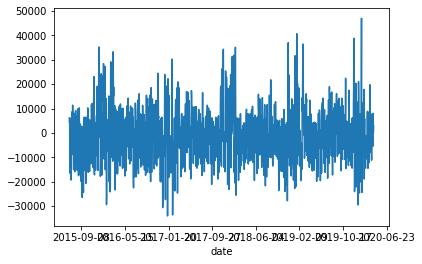

In [331]:
decomposition.resid.plot()

In [332]:
ts2['trend'] = decomposition.trend
ts2['seasonality'] = decomposition.seasonal
ts2['resid'] = decomposition.resid
ts2['time_index'] = np.arange(ts2.shape[0])

In [333]:
ts2['trend'] = ts2['trend'].fillna(ts2['trend'].mean())
ts2['seasonality'] = ts2['seasonality'].fillna(ts2['seasonality'].mean())
ts2['resid'] = ts2['resid'].fillna(ts2['resid'].mean())

In [334]:
X = ts2.drop(['demand'], axis=1).values
y = ts2['demand'].values

In [335]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [336]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

mean_absolute_error(y_test, y_pred)

2244.8956623815516

In [337]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state=42)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

mean_absolute_error(y_test, y_pred)

2371.8564965639835

In [338]:
# !pip install xgboost

In [339]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

mean_absolute_error(y_test, y_pred)

[19:40:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


2547.525271030806

The linear regression model did the best job with predictions.